# Car Price Prediction (Linear Regression - RFE)

<img src="https://media.istockphoto.com/vectors/car-vehicle-money-concept-vector-auto-tax-price-idea-automobile-cost-vector-id1272375584?k=20&m=1272375584&s=170667a&w=0&h=qRF4MWbhP-2BjpM1yATdtAeu4QwBsJItVDxcn_dldqc=" width=75% />


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv("../data/CarPrice_Assignment.csv")

In [4]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
45,46,0,isuzu D-Max V-Cross,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
44,45,1,isuzu D-Max,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
94,95,1,nissan leaf,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7299.0
164,165,1,toyota corona,gas,std,two,hatchback,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8238.0


In [4]:
df.shape

(205, 26)

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

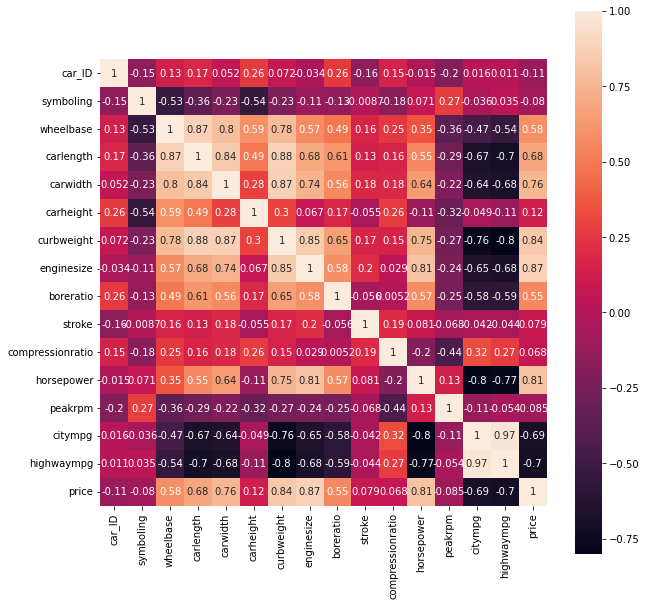

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,square=True)

In [10]:
# wheelbase , carlength , carwidth , curbwight , enginesize , horsepower , highwaympg , citympg

# price

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
X = df[['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','highwaympg','citympg']]

In [13]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [14]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [15]:
pd.get_dummies(df[['CarName','fueltype']])

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
df3 = df.groupby('CarName',as_index = False)['price'].mean().sort_values('price',ascending=False)

In [17]:
# df3.CarName
for i,x in df3.iterrows():
    
#     a = i.str.split(" ")[0]
    
    df3.loc[i,'model'] = x['CarName'].split(" ")[0]
    

In [18]:
df3.nunique()

CarName    147
price      134
model       28
dtype: int64

In [19]:
df3.groupby('model')['price'].median().sort_values(ascending=False)

model
jaguar         35550.000000
buick          32892.000000
porsche        32714.250000
porcshce       32528.000000
bmw            26778.750000
volvo          18735.000000
audi           17719.583500
mercury        16503.000000
alfa-romero    16500.000000
toyouta        15750.000000
peugeot        15435.833333
saab           15235.000000
vw             10787.500000
mazda          10345.000000
renault         9595.000000
toyota          9332.166667
volkswagen      8995.000000
isuzu           8916.500000
subaru          8911.875000
nissan          8774.000000
honda           8274.333333
mitsubishi      8189.000000
plymouth        7783.000000
vokswagen       7775.000000
dodge           7609.000000
chevrolet       6295.000000
maxda           5645.000000
Nissan          5499.000000
Name: price, dtype: float64

In [20]:
df3['price_category'] = pd.qcut(x=df3['price'], q=4,labels=[1,2,3,4])
df3.price_category = df3.price_category.astype('int')
df3.drop(columns=['CarName','price'],inplace=True)

In [21]:
df3.set_index('model')

,price_category
model,
buick,4
bmw,4
buick,4
porsche,4
jaguar,4
...,...
Nissan,1
mitsubishi,1
toyota,1


In [22]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
for i,x in df.iterrows():
    
#     a = i.str.split(" ")[0]
    
    df.loc[i,'brand'] = x['CarName'].split(" ")[0]
    

In [24]:
df = df.merge(df3,left_on='brand',right_on='model')

<AxesSubplot:>

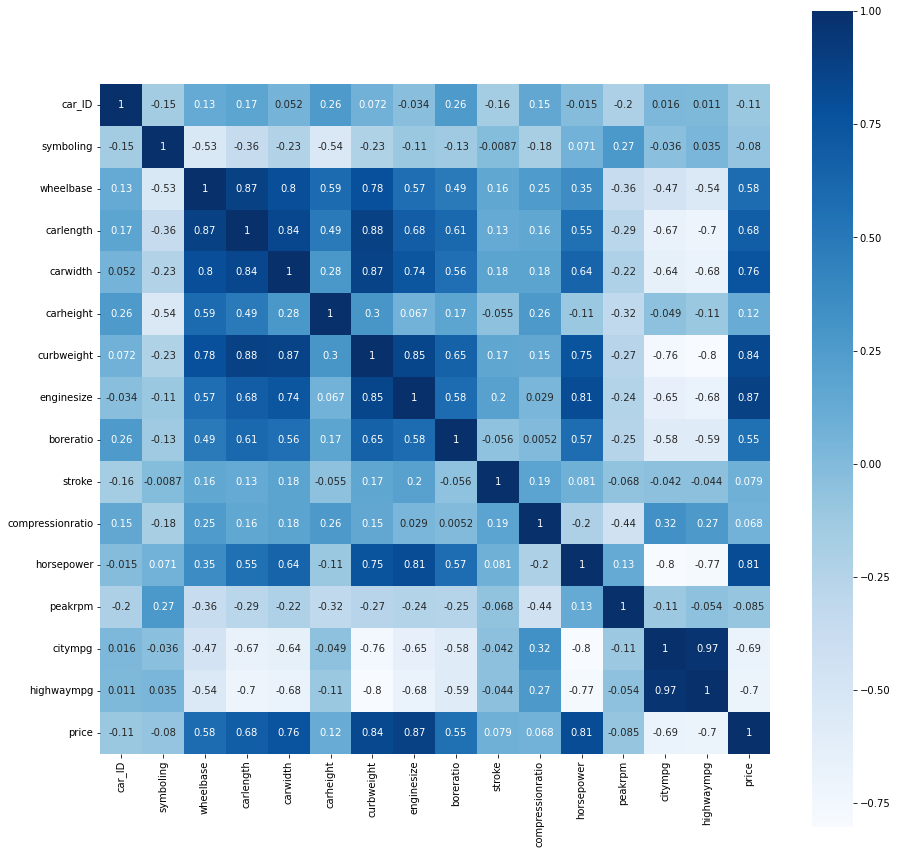

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,square=True,cmap='Blues')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 0 to 1739
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            1740 non-null   int64  
 1   symboling         1740 non-null   int64  
 2   CarName           1740 non-null   object 
 3   fueltype          1740 non-null   object 
 4   aspiration        1740 non-null   object 
 5   doornumber        1740 non-null   object 
 6   carbody           1740 non-null   object 
 7   drivewheel        1740 non-null   object 
 8   enginelocation    1740 non-null   object 
 9   wheelbase         1740 non-null   float64
 10  carlength         1740 non-null   float64
 11  carwidth          1740 non-null   float64
 12  carheight         1740 non-null   float64
 13  curbweight        1740 non-null   int64  
 14  enginetype        1740 non-null   object 
 15  cylindernumber    1740 non-null   object 
 16  enginesize        1740 non-null   int64  


In [27]:
regresor = LinearRegression()
X = df[['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','highwaympg','citympg','price_category']]
# X = df[['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','highwaympg','citympg']]
y = df[['price']]

In [28]:

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=26)

In [29]:
lm = regresor.fit(X_train,y_train)
y_pred = lm.predict(X_train)

In [30]:
y_train

,price
772,9549.0
377,13645.0
1560,15998.0
1082,11694.0
478,28248.0
...,...
1101,5348.0
1126,6488.0
1456,17669.0
1342,9298.0


In [31]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8275079579322728
MAE: 2141.9539815682406
MSE: 8823024.60497194
RMSE: 2970.3576560697097


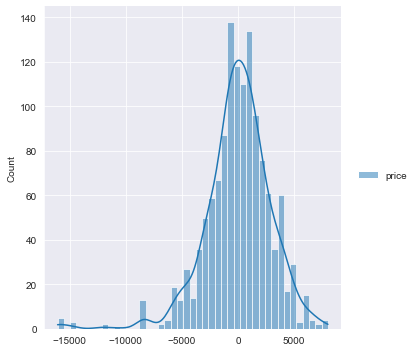

In [32]:
sns.set_style("darkgrid")
sns.displot(y_pred-y_train,kde=True)
plt.show()